In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib widget

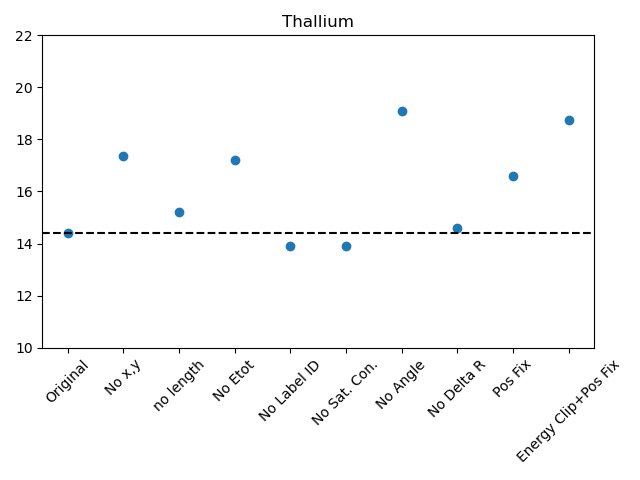

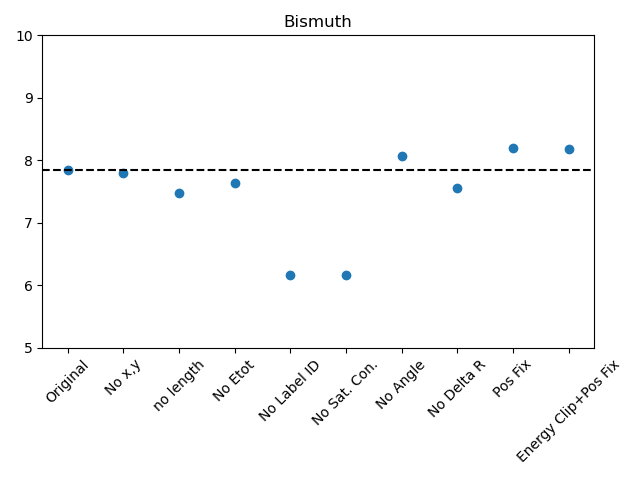

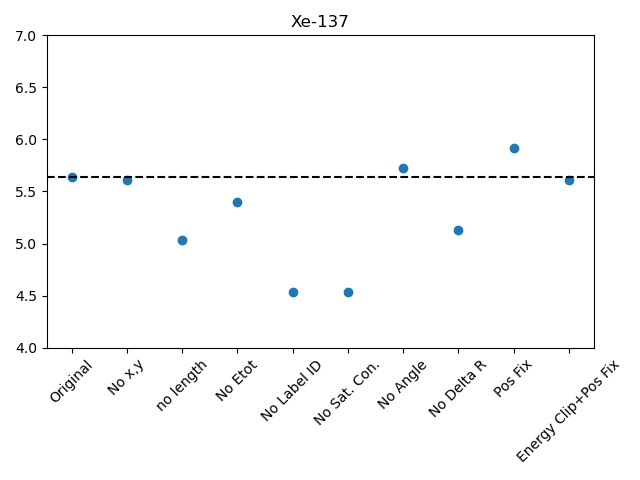

In [22]:

mode = ["Original", "No x,y", "no length", "No Etot", "No Label ID", "No Sat. Con.", "No Angle", "No Delta R", "Pos Fix", "Energy Clip+Pos Fix" ]

Tl     = [14.4, 17.38, 15.2, 17.2, 13.9, 13.9, 19.1, 14.6, 16.6, 18.75 ]
Bi     = [7.84,  7.79, 7.47, 7.63, 6.16, 6.16, 8.07, 7.55, 8.19, 8.18 ]
Single = [5.64,  5.61, 5.03, 5.40, 4.53, 4.53, 5.73, 5.13, 5.92, 5.61 ]

# Notes:
# The no satellite connections needs to be re-run again


plt.figure()

plt.scatter(mode, Tl)
plt.xticks(rotation = 45)
plt.ylim(10, 22)
plt.axhline(y=14.4, linestyle="--", c = "k")
plt.title("Thallium")
plt.tight_layout()

plt.figure()
plt.scatter(mode, Bi)
plt.xticks(rotation = 45)
plt.ylim(5, 10)
plt.axhline(y=7.84, linestyle="--", c = "k")
plt.title("Bismuth")
plt.tight_layout()

plt.figure()
plt.scatter(mode, Single)
plt.xticks(rotation = 45)
plt.ylim(4, 7)
plt.axhline(y=5.64, linestyle="--", c = "k")
plt.title("Xe-137")
plt.tight_layout()

In [3]:
# Calculate the expected rates using the GNN performances

Mcu = 201251
sec_in_yr = 3.15e7

Bi_rate = 1.28e-6 * 708/1e8 * sec_in_yr * Mcu
Tl_rate = 35.94e-2 * 1.22e-6 * 3153/1e7 * sec_in_yr * Mcu
Single_rate = 5827/100000 * 1.4 


print("Bi Rate = ", Bi_rate)
print("Tl Rate = ", Tl_rate)
print("Single Rate = ", Single_rate)

Bi Rate =  57.4502374656
Tl Rate =  876.4163581780026
Single Rate =  0.081578


In [28]:
Bi_Rej = 0.011511
Tl_Rej = 0.003013
Single_Rej = 0.024937

print("Bi GNN Rej Tot: ", Bi_Rej, ", ", round(1/Bi_Rej,1))
print("Tl GNN Rej Tot: ", Tl_Rej, ", ", round(1/Tl_Rej,1))
print("Single GNN Rej Tot: ", round(Single_Rej, 4), ", ", round(1/Single_Rej,1))

Bi_rate_tot_c = Bi_rate * 0.264 * Bi_Rej
Tl_rate_tot_c = Tl_rate * 0.072 * Tl_Rej
Single_rate_tot_c = Single_rate * 0.078 * Single_Rej

print("\nClassical Analysis")
print("Bi Rate = ", round(Bi_rate_tot_c, 2))
print("Tl Rate = ", round(Tl_rate_tot_c, 2))
print("Single Rate = ", round(Single_rate_tot_c, 5))
print("Total Rate:", round(Bi_rate_tot_c + Tl_rate_tot_c + Single_rate_tot_c, 2))


Bi GNN Rej Tot:  0.011511 ,  86.9
Tl GNN Rej Tot:  0.003013 ,  331.9
Single GNN Rej Tot:  0.0249 ,  40.1

Classical Analysis
Bi Rate =  0.17
Tl Rate =  0.19
Single Rate =  0.00016
Total Rate: 0.36


In [30]:
Bi_Rej_MLP = 0.05
Tl_Rej_MLP = 0.05
Single_Rej_MLP = 0.07

Bi_Rej_GNN = 0.08
Tl_Rej_GNN = 0.04
Single_Rej_GNN = 0.11

Bi_Rej = Bi_Rej_MLP * Bi_Rej_GNN
Tl_Rej = Tl_Rej_MLP * Tl_Rej_GNN
Single_Rej = Single_Rej_MLP * Single_Rej_GNN
print("Bi GNN Rej Tot: ", Bi_Rej, ", ", 1/Bi_Rej)
print("Tl GNN Rej Tot: ", Tl_Rej, ", ", 1/Tl_Rej)
print("Single GNN Rej Tot: ", round(Single_Rej, 4), ", ", round(1/Single_Rej,1))

Bi_rate_tot_gnn = Bi_rate * 0.264 * Bi_Rej
Tl_rate_tot_gnn = Tl_rate * 0.072 * Tl_Rej
Single_rate_tot_gnn = Single_rate * 0.078 * Single_Rej

print("\nGNN Analysis")
print("Bi Rate = ", round(Bi_rate_tot_gnn, 2))
print("Tl Rate = ", round(Tl_rate_tot_gnn, 2))
print("Single Rate = ", round(Single_rate_tot_gnn, 5))
print("Total Rate:", round(Bi_rate_tot_gnn + Tl_rate_tot_gnn + Single_rate_tot_gnn, 2))

Bi GNN Rej Tot:  0.004 ,  250.0
Tl GNN Rej Tot:  0.002 ,  500.0
Single GNN Rej Tot:  0.0077 ,  129.9

GNN Analysis
Bi Rate =  0.06
Tl Rate =  0.13
Single Rate =  5e-05
Total Rate: 0.19


In [ ]:
def ppt_Bq(U_ppt, Th_ppt):

    # 1 mBq-U-238/kg = 81 ppt U
    # 1 mBq Th-232/kg = 246 ppt Th

    print("U [muBq/kg]:", round(1e6*(U_ppt/81)*1e-3, 4), round(1e6*Th_ppt/246*1e-3, 4) )

ppt_Bq(0.1, 0.3)


U [muBq/kg]: 1.2346 1.2195


ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/Users/krishan.mistry/miniconda3/envs/mistry/lib/python3.13/site-packages/zmq/eventloop/zmqstream.py", line 575, in _log_error
    f.result()
    ~~~~~~~~^^
  File "/Users/krishan.mistry/miniconda3/envs/mistry/lib/python3.13/site-packages/ipykernel/kernelbase.py", line 643, in shell_channel_thread_main
    _, msg2 = self.session.feed_identities(msg, copy=False)
              ~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/krishan.mistry/miniconda3/envs/mistry/lib/python3.13/site-packages/jupyter_client/session.py", line 994, in feed_identities
    raise ValueError(msg)
ValueError: DELIM not in msg_list
ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/Users/krishan.mistry/miniconda3/envs/mistry/lib/python3.13/site-packages/zmq/eventloop/zmqstream.py", line 575, in _log_error
    f.result()
    ~~~~~~~~^^
  File "

In [ ]:
# Copper Radioactivities

# The NEXT-100 Detector https://arxiv.org/pdf/2505.17848
# Oxygen free Cu Plate EP U: 1.1 muBq/kg | Th: 0.1 muBq/kg
# Oxygen free Cu Plate TP: U: 1.2 muBq/kg | Th: 0.1 muBq/kg
# Electrolytic Cu Inner Shield: U: 7.4 muBq/kg | Th 1.2 muBq/kg

# NEXT-Tonne Sensitivity Paper
# U: 1.28 muBq/kg | Th 1.22 muBq/kg

# Majorana Demonstrator doi:10.1016/j.nima.2016.04.070
# Copper C10100 Plate 1": U: 0.013 ppt = 0.16 muBq/kg | Th: 0.029 ppt = 0.11 muBq/kg
# simular values of   U = 0.017, 0.009, 0.061|    Th [ppt] = 0.03, 0.03, 0.049

